In [1]:
# 导入数据分析和可视化所需的库
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import pandas as pd  # 用于数据处理
import seaborn as sns  # 用于统计数据可视化
import warnings
from scipy import stats  # 用于统计分析

warnings.filterwarnings('ignore')  # 忽略警告信息

In [10]:
# 定义数据文件路径
train_data_file = '/Users/zhuzijie/Downloads/zhengqi/zhengqi_train.txt'
test_data_file = '/Users/zhuzijie/Downloads/zhengqi/zhengqi_test.txt'
# 读取训练和测试数据集（以制表符分隔）
train_data = pd.read_csv(train_data_file, sep='\t')
test_data = pd.read_csv(test_data_file, sep='\t')
# 显示训练数据的统计摘要
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


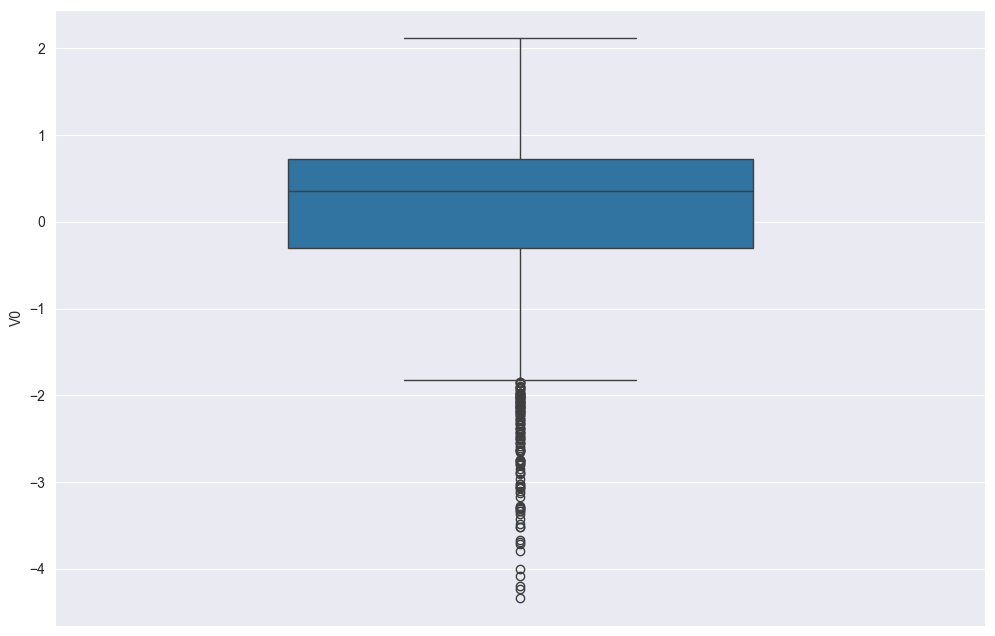

In [12]:
# 为V0特征创建单独的箱线图
fig_test = plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(train_data['V0'], width=0.5)  # 绘制箱线图，宽度为0.5
plt.savefig('./2-特征箱式图.jpg', dpi=300)  # 保存图形为高分辨率图片

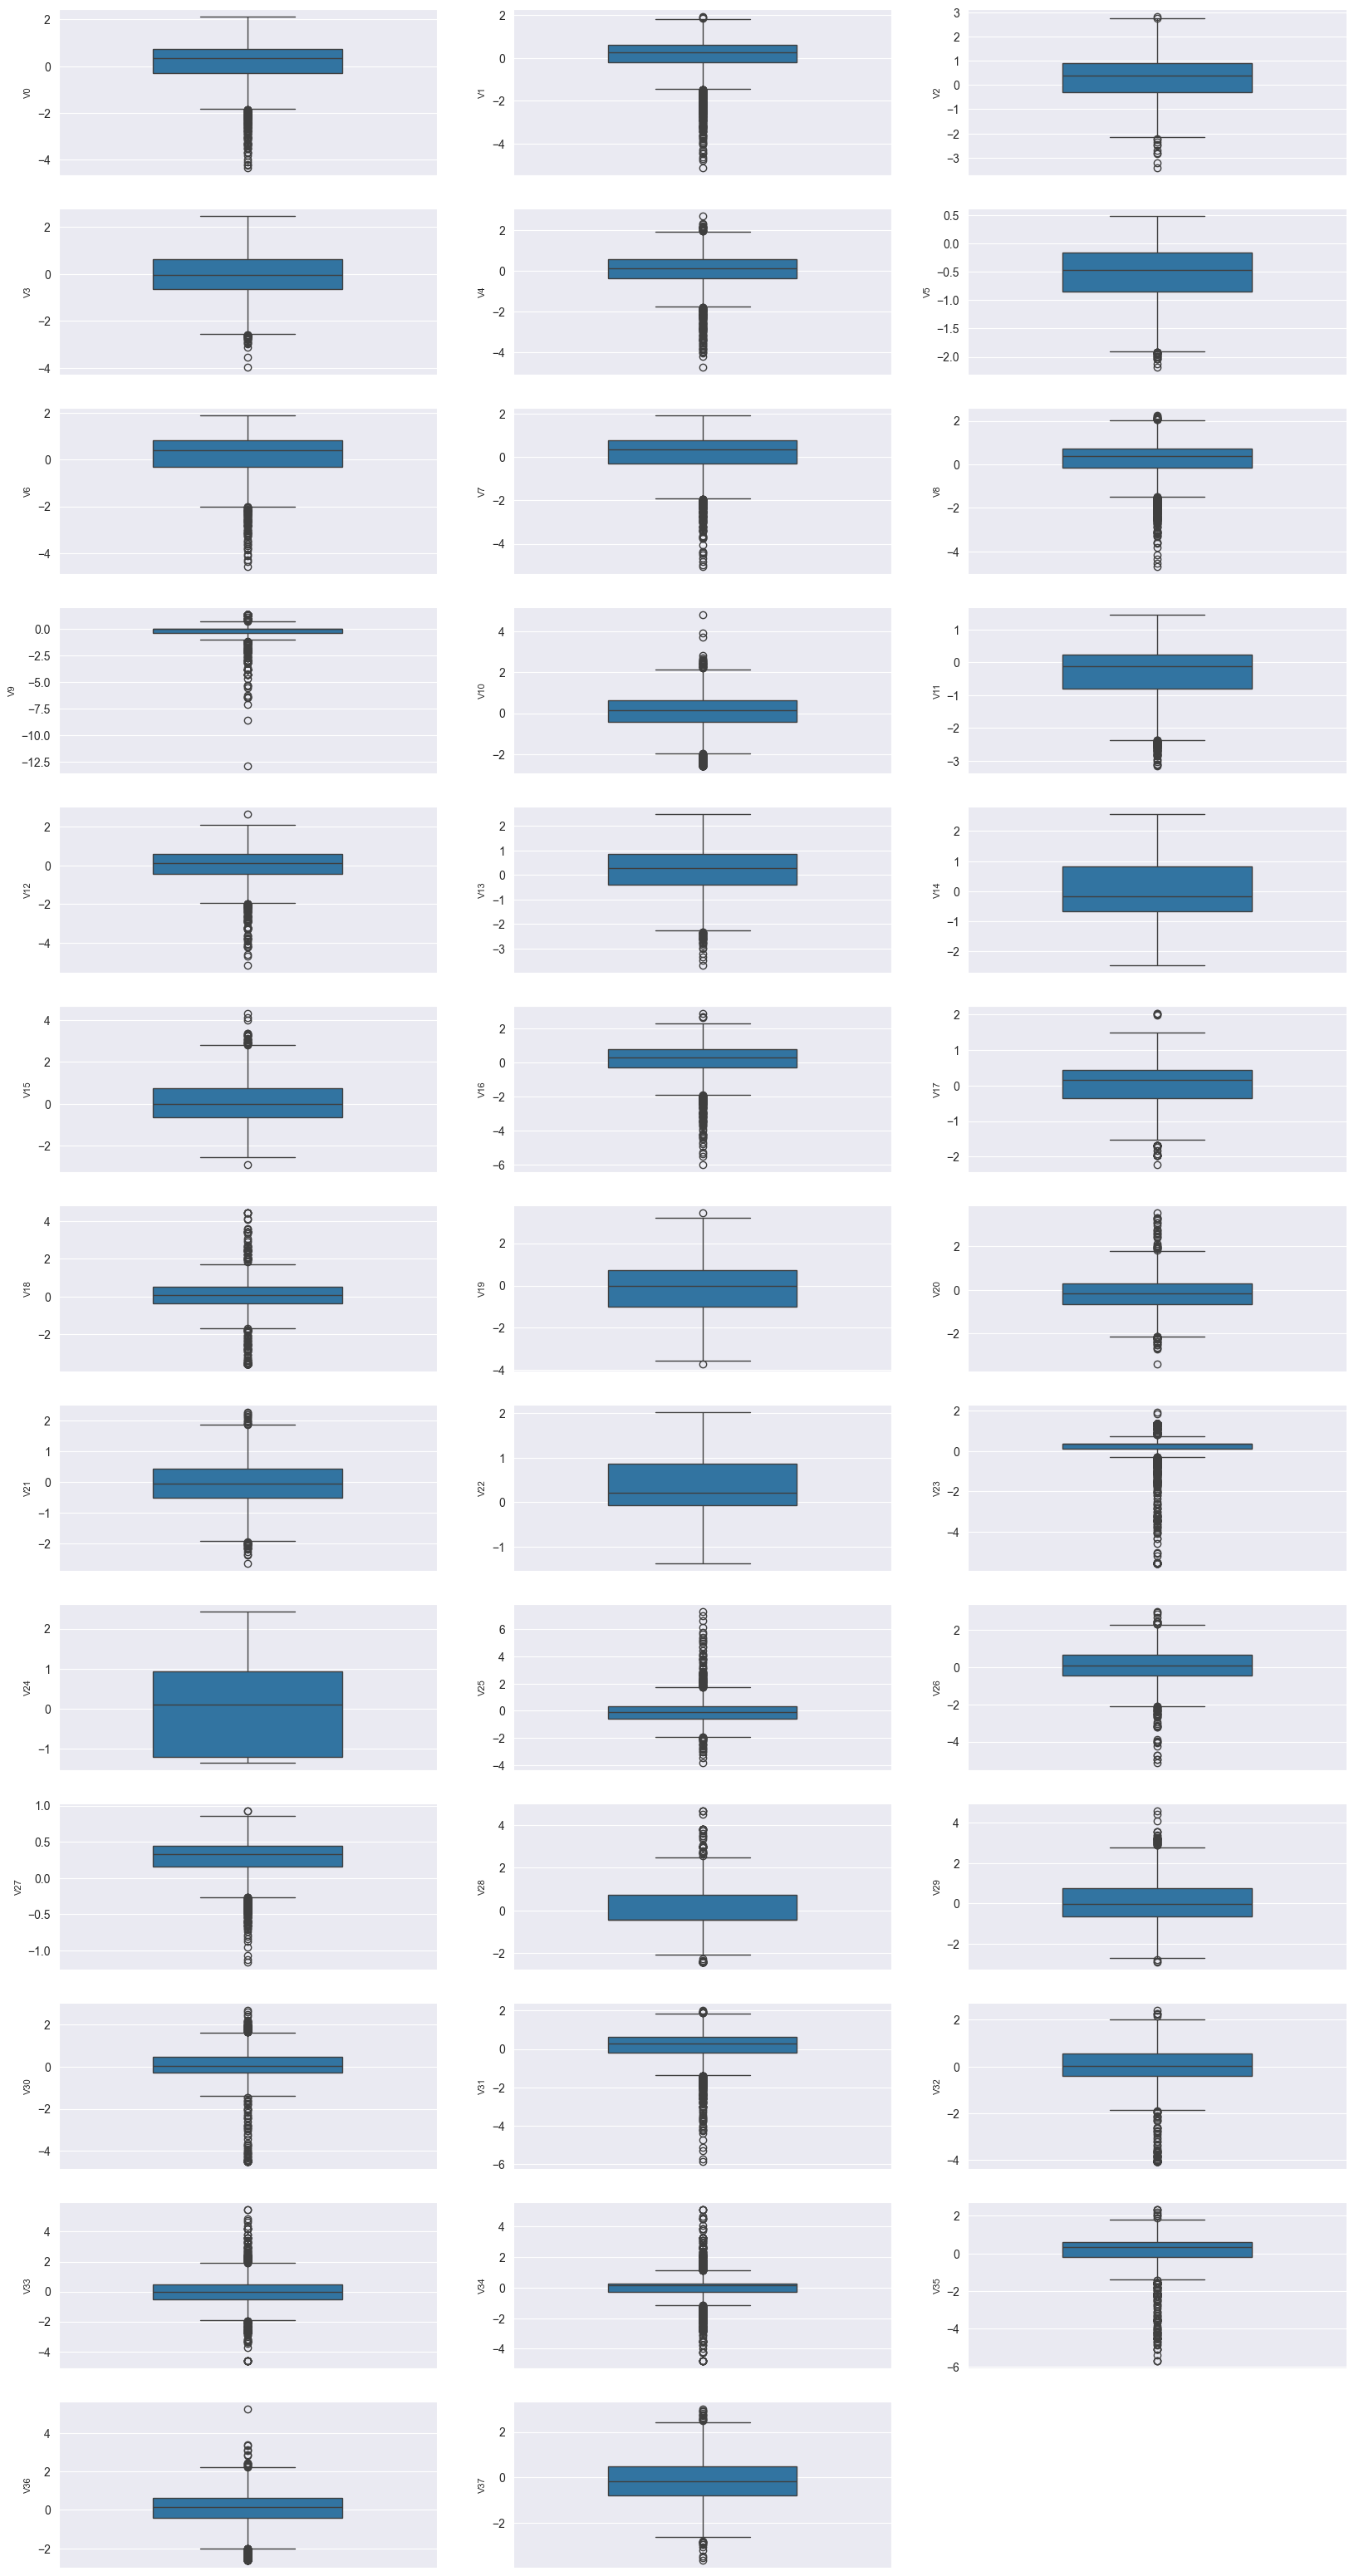

In [14]:
# 为所有特征绘制箱线图
column = train_data.columns.tolist()[:39]  # 获取前39个特征名称
fig = plt.figure(figsize=(20, 40))  # 创建大画布
for i in range(38):  # 循环处理前38个特征
    plt.subplot(13, 3, i + 1)  # 创建13行3列的子图布局
    sns.boxplot(train_data[column[i]], width=0.5)  # 为每个特征绘制箱线图
    plt.ylabel(column[i], fontsize=8)  # 设置y轴标签为特征名称

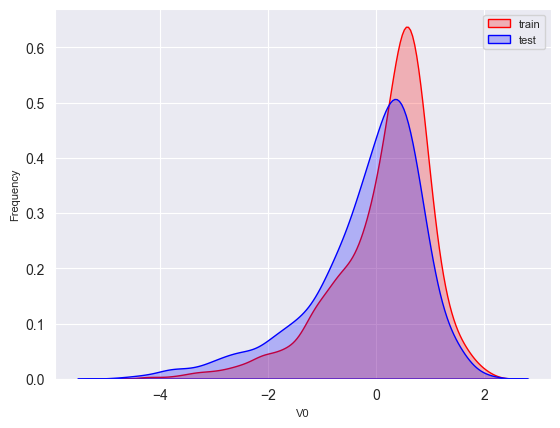

In [20]:
ax = sns.kdeplot(train_data['V0'], color='Red', shade=True)  # 绘制训练数据的核密度估计图
ax = sns.kdeplot(test_data['V0'], color='Blue', shade=True)  # 绘制测试数据的核密度估计图

ax.set_xlabel('V0', fontsize=8)  # 设置x轴标签
ax.set_ylabel('Frequency', fontsize=8)  # 设置y轴标签
ax = ax.legend(['train', 'test'], fontsize=8)  # 添加图例
plt.savefig('./3-数据分布.jpg', dpi=300)  # 保存图形为高分辨率图片

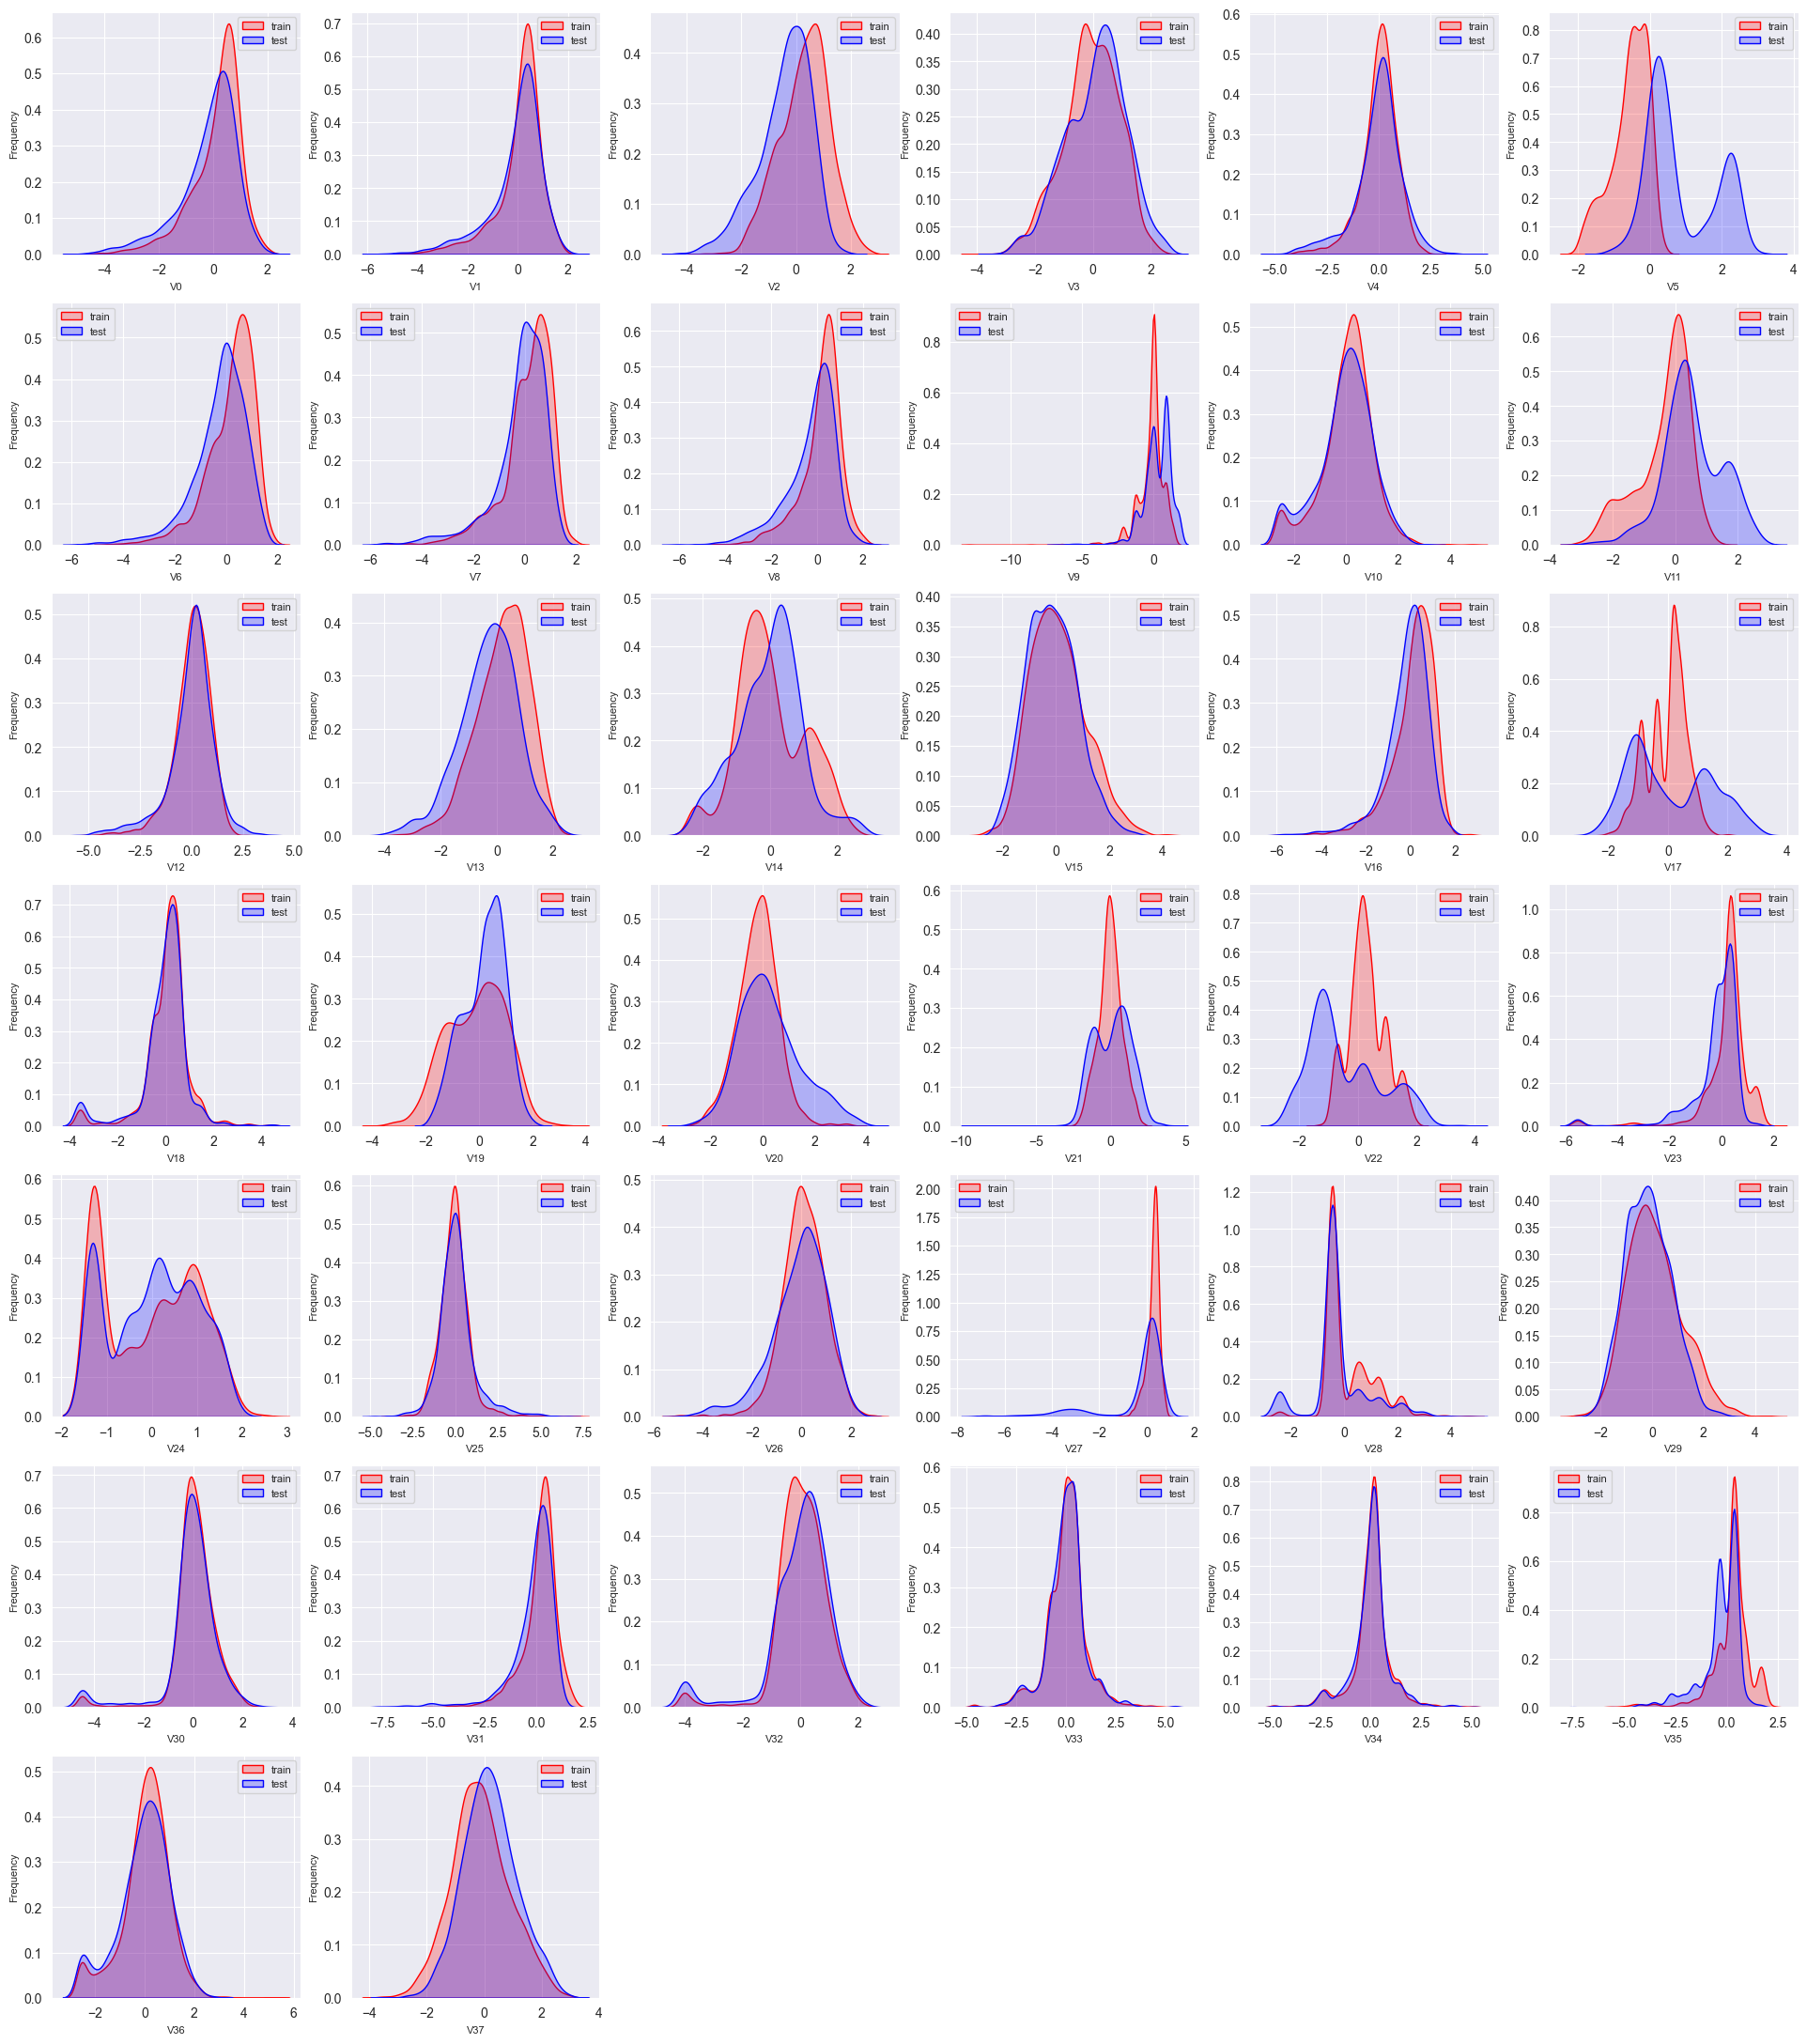

In [26]:
dist_col = 6
dist_rows = len(test_data.columns) // 6 + 1
plt.figure(figsize=(4 * dist_col, 4 * dist_rows))  # 设置图形大小
i = 1
for col in test_data.columns:  # 遍历测试数据的每一列
    ax = plt.subplot(dist_rows, dist_col, i)  # 创建子图
    ax = sns.kdeplot(train_data[col], color='Red', shade=True)  # 绘制训练数据的核密度估计图
    ax = sns.kdeplot(test_data[col], color='Blue', shade=True)  # 绘制测试数据的核密度估计图
    ax.set_xlabel(col, fontsize=8)  # 设置x轴标签为特征名称
    ax.set_ylabel('Frequency', fontsize=8)  # 设置y轴标签
    ax = ax.legend(['train', 'test'], fontsize=8)  # 添加图例
    i += 1  # 更新子图索引

In [22]:
dist_rows = len(test_data.columns)
dist_rows

38